In [1]:
# Importing modules needed for data analysis.
from scipy.odr import ODR, Model, Data, RealData
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit,fmin
from scipy import signal as ss
from scipy import constants as cs
from pylab import *
import glob

In [2]:
## Function to fix spaces in urls
def url(path):
    path = 'https://gitlab.com/xmoskala/srlab/-/raw/main/BandGap'+path+'.txt'
    path = path.replace(" ", "%20")
    return path



In [3]:
%%capture --no-display
#Read in data from gitlab

Si20 = np.array([pd.read_csv(url("/3_7_23Si20"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_7_23Si20"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si10 = np.array([pd.read_csv(url("/3_2_23Si10"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Si10"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si0 = np.array([pd.read_csv(url("/3_2_23Si0"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Si0"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si_10 = np.array([pd.read_csv(url("/3_2_23Si-10"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Si-10"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si_20 = np.array([pd.read_csv(url("/3_7_23Si-20"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_7_23Si-20"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])

Ge20 = np.array([pd.read_csv(url("/3_7_23Ge20"), skiprows=1, sep='  ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_7_23Ge20"), skiprows=1, sep='  ').to_numpy().T[1][:-2]])
Ge10 = np.array([pd.read_csv(url("/3_2_23Ge10"), skiprows=1, sep='  ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Ge10"), skiprows=1, sep='  ').to_numpy().T[1][:-2]])
Ge0 = np.array([pd.read_csv(url("/3_2_23Ge0"), skiprows=1, sep='  ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Ge0"), skiprows=1, sep='  ').to_numpy().T[1][:-2]])
Ge_10 = np.array([pd.read_csv(url("/3_2_23Ge-10"), skiprows=1, sep='  ').to_numpy().T[0][:-15]*10**(3), pd.read_csv(url("/3_2_23Ge-10"), skiprows=1, sep='  ').to_numpy().T[1][:-15]])
Ge_20 = np.array([pd.read_csv(url("/3_7_23Ge-20"), skiprows=1, sep='  ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_7_23Ge-20"), skiprows=1, sep='  ').to_numpy().T[1][:-2]])




In [4]:
def assump(V,T):
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return np.exp(q*V/(k*T))

Tarr = np.array([293,283,273,263,253])
Varr = np.ones(5)*0.1
print(assump(Varr,Tarr))


[52.4880954  60.37266515 70.15725614 82.46420371 98.17641918]


In [5]:
#Theory

def current(beta, V):
    I_0,T = beta
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return I_0*(np.exp((q*V)/(k*T))-1)


In [6]:
def fit(dat,temp):
    data = RealData(dat[1], dat[0], sx= 0.01*dat[1], sy=0.05*dat[0])
    model = Model(current)

    odr = ODR(data,model, beta0=[10e-6, temp], ifixb=[1,0] )
    
    odr.set_job(fit_type=2)
    output1 = odr.run()
    
    odr.set_job(fit_type=0)
    output2 = odr.run()
    return [output1.beta,output1.sd_beta],[output2.beta,output2.sd_beta]

In [7]:
ls,odr = fit(Si0,273)

print(odr)

[array([2.56565552e-12, 2.73000000e+02]), array([9.51437613e-14, 0.00000000e+00])]


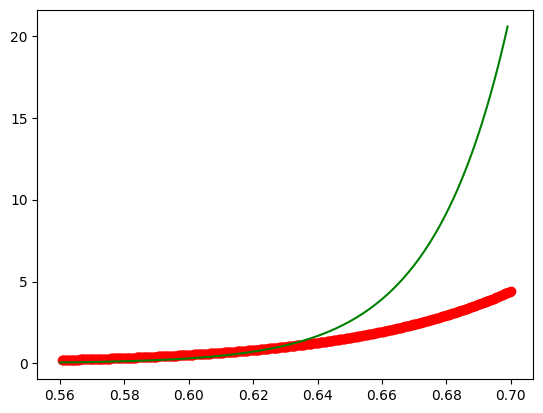

In [8]:
x = np.arange(0.56,0.7,.001)
y = current(odr[0],x)

plot(Si0[1],Si0[0],'ro')

plot(x,y,'g-',label='odr')

In [9]:

a,odrSi20 = fit(Si20,293)
a,odrSi10 = fit(Si10,283)
a,odrSi0 = fit(Si0,273)
a,odrSi_10 = fit(Si_10,263)
a,odrSi_20 = fit(Si_20,253)

a,odrGe20 = fit(Ge20,293)
a,odrGe10 = fit(Ge10,283)
a,odrGe0 = fit(Ge0,273)
a,odrGe_10 = fit(Ge_10,263)
a,odrGe_20 = fit(Ge_20,253)




/home/xavier/.local/lib/python3.11/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in divide
  return 1./numpy.power(sd, 2)


In [10]:
def fit(dat,temp,cut1,cut2):
    data = RealData(dat[1][cut1:cut2], dat[0][cut1:cut2], sx= 0.01*dat[1][cut1:cut2], sy=0.05*dat[0][cut1:cut2])
    model = Model(current)

    odr = ODR(data,model, beta0=[10e-6, temp], ifixb=[1,0] )
    
    odr.set_job(fit_type=2)
    output1 = odr.run()
    
    odr.set_job(fit_type=0)
    output2 = odr.run()
    return [output1.beta,output1.sd_beta],[output2.beta,output2.sd_beta]

In [11]:

a,odrSi20 = fit(Si20,293,0,-1)
a,odrSi10 = fit(Si10,283,0,-1)
a,odrSi0 = fit(Si0,273,0,-1)
a,odrSi_10 = fit(Si_10,263,0,-1)
a,odrSi_20 = fit(Si_20,253,0,-1)

a,odrGe20 = fit(Ge20,293,0,-1)
a,odrGe10 = fit(Ge10,283,0,-1)
a,odrGe0 = fit(Ge0,273,0,-1)
a,odrGe_10 = fit(Ge_10,263,0,-1)
a,odrGe_20 = fit(Ge_20,253,0,-1)


In [12]:
I_0 = np.array([odrSi20[0][0],odrSi10[0][0],odrSi0[0][0],
               odrSi_10[0][0],odrSi_20[0][0],odrGe20[0][0],
               odrGe10[0][0],odrGe0[0][0],odrGe_10[0][0],odrGe_20[0][0]])

x = 1/np.array([293,283,273,263,253,293,283,273,263,253])
y = np.log(I_0)
print(I_0[6])

1.4619577010546035e-06


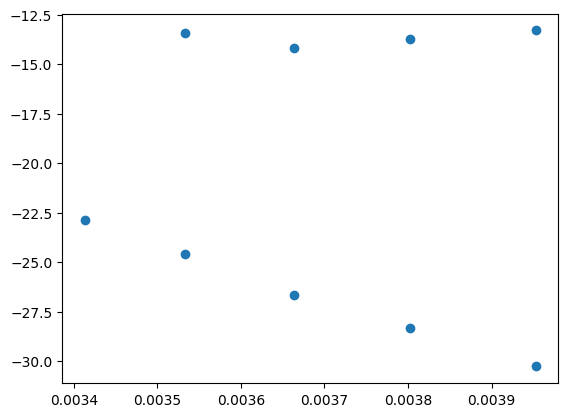

In [13]:
plt.scatter(x,y)

In [14]:
%%capture --no-display
#2nd data collection for Ge

v20 = -88
v10 = -41
v0 = -2
v_10 = -67
v_20 = -60

Ge20 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge20"), skiprows=1, sep='  ').to_numpy().T[0][:v20]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge20"), skiprows=1, sep='  ').to_numpy().T[1][:v20]])
Ge10 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge10"), skiprows=1, sep='  ').to_numpy().T[0][:v10]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge10"), skiprows=1, sep='  ').to_numpy().T[1][:v10]])
Ge0 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge0"), skiprows=1, sep='  ').to_numpy().T[0][:v0]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge0"), skiprows=1, sep='  ').to_numpy().T[1][:v0]])
Ge_10 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge_10"), skiprows=1, sep='  ').to_numpy().T[0][:v_10]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge_10"), skiprows=1, sep='  ').to_numpy().T[1][:v_10]])
Ge_20 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge_20"), skiprows=1, sep='  ').to_numpy().T[0][:v_20]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge_20"), skiprows=1, sep='  ').to_numpy().T[1][:v_20]])



In [15]:

a,odrSi20 = fit(Si20,293,0,-1)
a,odrSi10 = fit(Si10,283,0,-1)
a,odrSi0 = fit(Si0,273,0,-1)
a,odrSi_10 = fit(Si_10,263,0,-1)
a,odrSi_20 = fit(Si_20,253,0,-1)

a,odrGe20 = fit(Ge20,293,0,-1)
a,odrGe10 = fit(Ge10,283,0,-1)
a,odrGe0 = fit(Ge0,273,0,-1)
a,odrGe_10 = fit(Ge_10,263,0,-1)
a,odrGe_20 = fit(Ge_20,253,0,-1)


In [16]:
I_0 = np.array([odrSi20[0][0],odrSi10[0][0],odrSi0[0][0],
               odrSi_10[0][0],odrSi_20[0][0],odrGe20[0][0],
               odrGe10[0][0],odrGe0[0][0],odrGe_10[0][0],odrGe_20[0][0]])

x = 1/np.array([293,283,273,263,253,293,283,273,263,253])
y = np.log(I_0)
print(y)
print(I_0[6])

[-22.86489528 -24.59463974 -26.68623666 -28.34403828 -30.27565786
 -10.5088133  -12.30284655 -14.04009176 -12.51230118 -13.3606206 ]
4.538806130119164e-06


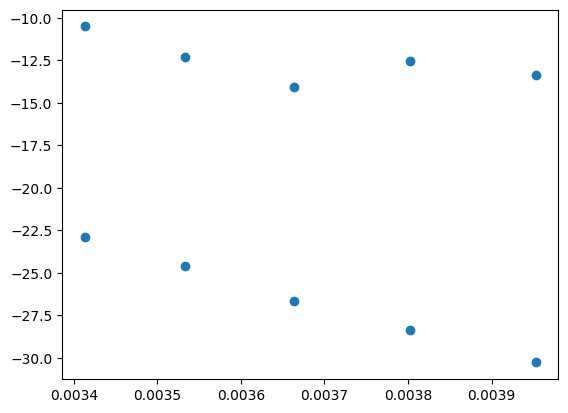

In [17]:
plt.scatter(x,y)

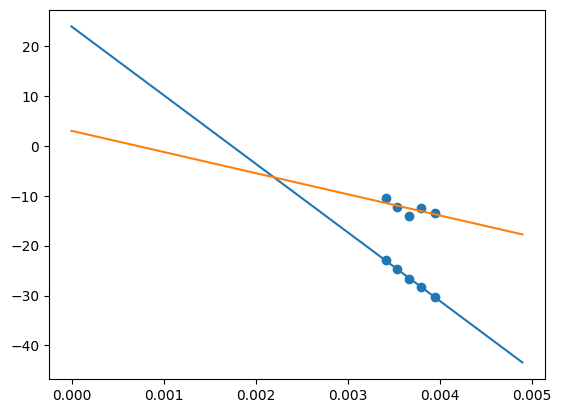

In [18]:
def lin(x,m,b):
    return m*x+b

p1, C1 = curve_fit(lin, x[0:5], y[0:5])
sigp = np.sqrt(np.diag(C1))
mSi = p1[0]
bSi = p1[1]

p2, C2 = curve_fit(lin, x[5:], y[5:])
sigp = np.sqrt(np.diag(C2))
mGe = p2[0]
bGe = p2[1]


plt.scatter(x,y)
ran = np.arange(0,0.005,0.0001)
plt.plot(ran,lin(ran,mSi,bSi))
plt.plot(ran,lin(ran,mGe,bGe))

In [20]:
# Alternative model, Non-ideal Diode

def current(beta, V):
    I_0,T,n = beta
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return I_0*(np.exp((q*V)/(n*k*T))-1)

In [21]:
def fit(dat,temp,cut1,cut2):
    data = RealData(dat[1][cut1:cut2], dat[0][cut1:cut2], sx= 0.01*dat[1][cut1:cut2], sy=0.05*dat[0][cut1:cut2])
    model = Model(current)

    odr = ODR(data,model, beta0=[10e-6, temp,1], ifixb=[1,0,1] )
    
    odr.set_job(fit_type=2)
    output1 = odr.run()
    
    odr.set_job(fit_type=0)
    output2 = odr.run()
    return [output1.beta,output1.sd_beta],[output2.beta,output2.sd_beta]

In [22]:

a,odrSi20 = fit(Si20,293,0,-1)
a,odrSi10 = fit(Si10,283,0,-1)
a,odrSi0 = fit(Si0,273,0,-1)
a,odrSi_10 = fit(Si_10,263,0,-1)
a,odrSi_20 = fit(Si_20,253,0,-1)

a,odrGe20 = fit(Ge20,293,0,-1)
a,odrGe10 = fit(Ge10,283,0,-1)
a,odrGe0 = fit(Ge0,273,0,-1)
a,odrGe_10 = fit(Ge_10,263,0,-1)
a,odrGe_20 = fit(Ge_20,253,0,-1)


/home/xavier/.local/lib/python3.11/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in divide
  return 1./numpy.power(sd, 2)


In [23]:
ls,odr = fit(Si0,273,0,-1)

print(odr)

[array([9.87037125e-07, 2.73000000e+02, 1.93722321e+00]), array([1.32998789e-08, 0.00000000e+00, 1.89771237e-03])]


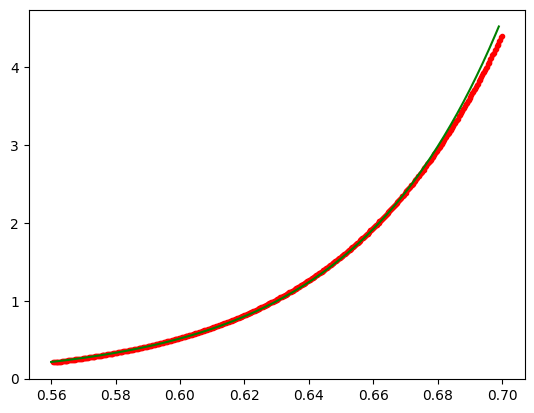

In [24]:
x = np.arange(0.56,0.7,.001)
y = current(odr[0],x)

plot(Si0[1],Si0[0],'r.')

plot(x,y,'g-',label='odr')

In [25]:
I_0 = np.array([odrSi20[0][0],odrSi10[0][0],odrSi0[0][0],
               odrSi_10[0][0],odrSi_20[0][0],odrGe20[0][0],
               odrGe10[0][0],odrGe0[0][0],odrGe_10[0][0],odrGe_20[0][0]])

x = 1/np.array([293,283,273,263,253,293,283,273,263,253])
y = np.log(I_0)


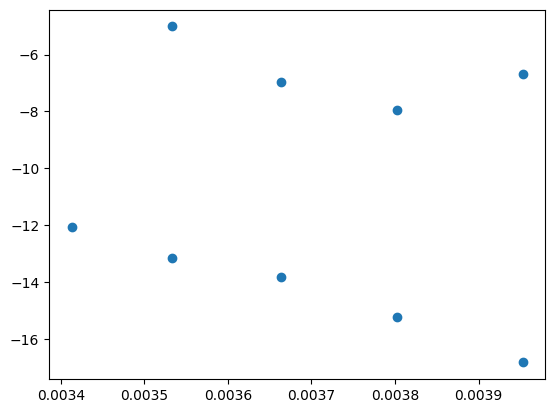

In [26]:
plt.scatter(x,y)

In [27]:
def lin(x,m,b):
    return m*x+b

p1, C1 = curve_fit(lin, x[0:5], y[0:5])
sigp = np.sqrt(np.diag(C1))
mSi = p1[0]
bSi = p1[1]

p2, C2 = curve_fit(lin, x[5:], y[5:])
sigp = np.sqrt(np.diag(C2))
mGe = p2[0]
bGe = p2[1]


plt.scatter(x,y)
ran = np.arange(0,0.005,0.0001)
plt.plot(ran,lin(ran,mSi,bSi))
plt.plot(ran,lin(ran,mGe,bGe))

ValueError: array must not contain infs or NaNs